In [ ]:
pip install tensorflow.gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
pip install mlxtend==0.17.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.1 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing import image

In [ ]:
(input_train,output_train),(input_test,output_test) = datasets.cifar10.load_data()
print(input_test.shape)
print(input_train.shape)
print(output_train.shape)
print(output_test.shape)

print(output_train)
print(output_test)
input_train = input_train/255
input_test = input_test/255
input_train.max()

170498071/170498071 [==============================] - 6s 0us/step
(10000, 32, 32, 3)
(50000, 32, 32, 3)
(50000, 1)
(10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


1.0

In [ ]:
Categories = ['airplane','automobile','bird','cat','deer','dog','frog','hourse','ship','truck']

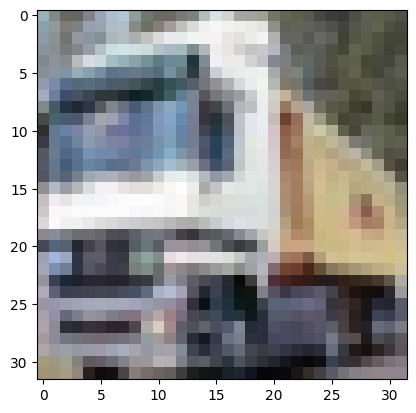

In [ ]:
plt.imshow(input_train[1])

In [ ]:
#creating a model
from tensorflow.keras import Sequential
my_model = Sequential()
my_model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))
my_model.add(MaxPool2D(pool_size=(2,2), padding='valid', strides=2))
my_model.add(Dropout(0.5))

my_model.add(Conv2D(filters=16,kernel_size=(3,3),padding='same', activation='relu'))
my_model.add(MaxPool2D(pool_size=(2,2),padding='valid', strides=2))
my_model.add(Dropout(0.5))

my_model.add(Flatten())
#my_model.add(BatchNormalization())
my_model.add(Dense(units = 256,activation='relu'))
my_model.add(Dense(units =128,activation='relu'))
my_model.add(Dense(units =10,activation='sigmoid'))
my_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 16)          0

In [ ]:
my_model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

if you are usingcategorical_crossentropy then Dense units =1 && if you are using usingcategorical_crossentropy then Dense units=10

In [ ]:
output_train=output_train.reshape(-1)
output_test=output_test.reshape(-1)

In [ ]:
print(output_train.shape)
print(input_train.shape)
print(input_test.shape)
print(output_test.shape)

(50000,)
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000,)


In [ ]:
hist = my_model.fit(input_train,output_train,batch_size=20,epochs=15,verbose=1, validation_data=(input_test,output_test))

Epoch 1/15
2500/2500 [==============================] - 84s 33ms/step - loss: 1.6595 - accuracy: 0.3906 - val_loss: 1.3787 - val_accuracy: 0.4989
Epoch 2/15
2500/2500 [==============================] - 80s 32ms/step - loss: 1.3930 - accuracy: 0.4999 - val_loss: 1.2072 - val_accuracy: 0.5707
Epoch 3/15
2500/2500 [==============================] - 86s 34ms/step - loss: 1.2812 - accuracy: 0.5390 - val_loss: 1.1706 - val_accuracy: 0.5900
Epoch 4/15
2500/2500 [==============================] - 83s 33ms/step - loss: 1.2117 - accuracy: 0.5661 - val_loss: 1.1201 - val_accuracy: 0.6004
Epoch 5/15
2500/2500 [==============================] - 82s 33ms/step - loss: 1.1587 - accuracy: 0.5870 - val_loss: 1.0414 - val_accuracy: 0.6321
Epoch 6/15
2500/2500 [==============================] - 78s 31ms/step - loss: 1.1155 - accuracy: 0.6016 - val_loss: 1.0358 - val_accuracy: 0.6291
Epoch 7/15
2500/2500 [==============================] - 78s 31ms/step - loss: 1.0830 - accuracy: 0.6139 - val_loss: 0.9801 -

In [ ]:
my_model.evaluate(input_test,output_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.8735 - accuracy: 0.6893


[0.8734725713729858, 0.689300000667572]

Text(0.5, 0, 'epoch')

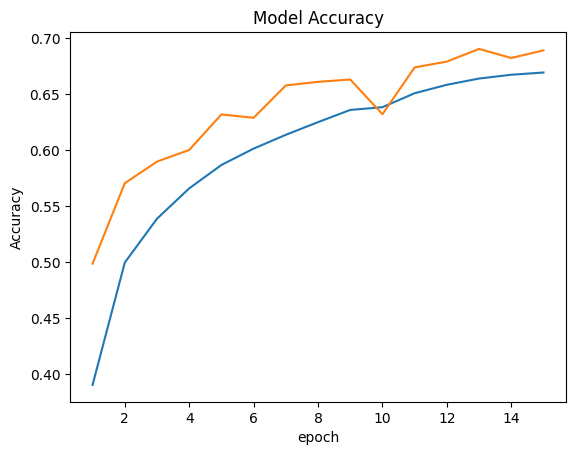

In [ ]:
epoch_range = range(1,16)
plt.plot(epoch_range,hist.history['accuracy']) 
plt.plot(epoch_range,hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')

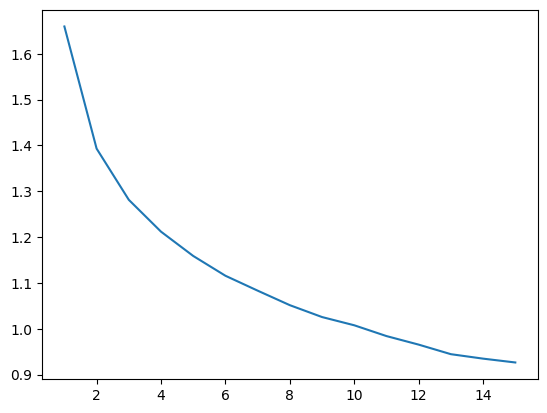

In [ ]:
plt.plot(epoch_range,hist.history['loss'])

In [ ]:
from google.colab import files
loaded = files.upload()


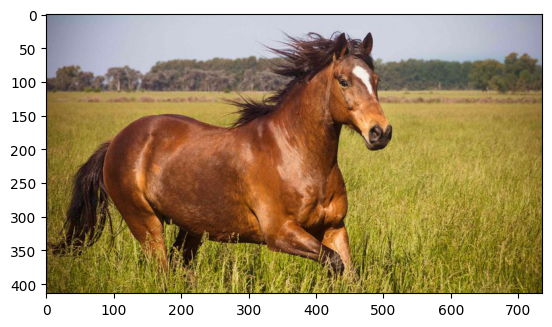

In [ ]:
img = plt.imread('hourse')
plt.imshow(img)

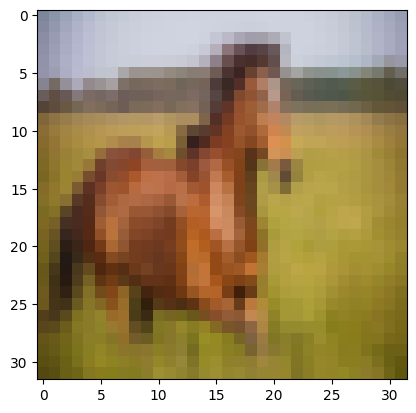

In [ ]:
from skimage.transform import resize
resized_img = resize(img,(32,32,3))
plt.imshow(resized_img)

In [ ]:
prediction = np.argmax(my_model.predict(np.expand_dims(resized_img, axis=0)))
print(prediction)

1/1 [==============================] - 0s 27ms/step
7


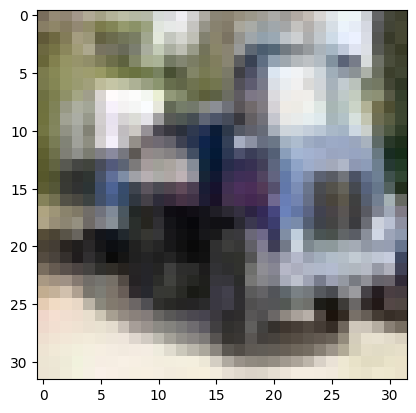

In [ ]:
testimage = input_test[28]
plt.imshow(testimage)


In [ ]:
testimage = testimage.reshape(-1,32,32,3)
prediction = np.argmax(my_model.predict(testimage))
prediction

1/1 [==============================] - 0s 24ms/step


9